In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir
import category_encoders as ce
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.DataFrame()

for filename in listdir("dataset\\dataset\\train\\boxes_transcripts_labels\\"):
# for filename in listdir("dataset\\dataset\\train\\New\\"):
    df_temp = pd.read_csv("dataset\\dataset\\train\\boxes_transcripts_labels\\" + filename, sep = ",", header = None)
    df_temp.columns = ['start_index', 'end_index', 'x_top_left', 'y_top_left', 'x_bottom_right', 'y_bottom_right','transcript','field']
    #df_temp_trimmed = df_temp.loc[df_temp['field'] != 'OTHER']

    df = pd.concat([df, df_temp], ignore_index = True)

# df['x_center'] = df[['x_top_left', 'x_bottom_right']].mean(axis=1)
# df['y_center'] = df[['y_top_left', 'y_bottom_right']].mean(axis=1)

# df.drop(['x_top_left', 'y_top_left','x_bottom_right','y_bottom_right','transcript'], axis=1)
# df = df[['start_index', 'end_index', 'x_center', 'y_center','field']]

# y = df['field']
# X = df.drop(['field'], axis = 1)


df.dropna(inplace=True) # 58 rows had NaN in transcript column
df.dtypes

df = df.drop(['transcript'], axis = 1)
df.describe()

,start_index,end_index,x_top_left,y_top_left,x_bottom_right,y_bottom_right
count,237558.000000,237558.000000,237558.000000,237558.000000,237558.000000,237558.000000
mean,5866.570896,5870.334251,885.841112,1183.259452,939.037317,1209.707507
std,4909.588481,4909.519821,614.092519,773.204461,616.440183,776.557540
min,0.000000,0.000000,2.000000,1.000000,20.000000,18.000000
25%,1768.000000,1771.000000,346.000000,551.000000,398.000000,575.000000
50%,4603.000000,4607.000000,816.000000,1046.000000,868.000000,1074.000000
75%,9094.000000,9098.000000,1349.000000,1773.000000,1395.000000,1805.000000
max,24646.000000,24654.000000,2395.000000,3070.000000,2458.000000,3103.000000


In [4]:
encoder = ce.ordinal.OrdinalEncoder()
df['field'] = encoder.fit_transform(df['field'])

In [5]:
df['x_center'] = df[['x_top_left', 'x_bottom_right']].mean(axis=1)
df['y_center'] = df[['y_top_left', 'y_bottom_right']].mean(axis=1)

# df = df.drop(['x_top_left', 'y_top_left','x_bottom_right','y_bottom_right'], axis=1)

<Axes: >

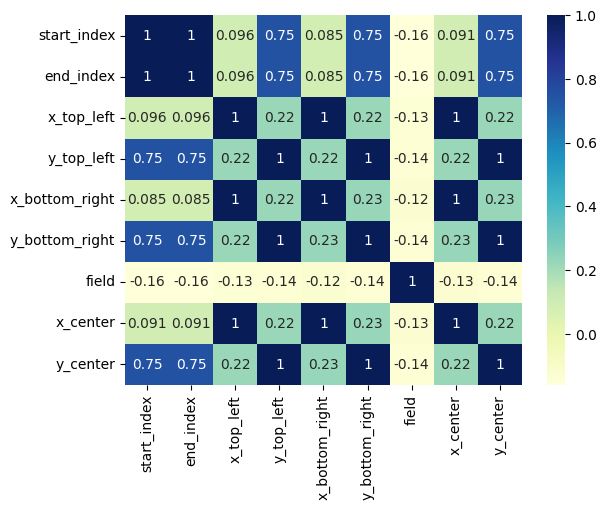

In [6]:
corrM = df.corr()
sns.heatmap(corrM, annot=True, cmap="YlGnBu")

array([[<Axes: title={'center': 'start_index'}>,
        <Axes: title={'center': 'end_index'}>,
        <Axes: title={'center': 'x_top_left'}>],
       [<Axes: title={'center': 'y_top_left'}>,
        <Axes: title={'center': 'x_bottom_right'}>,
        <Axes: title={'center': 'y_bottom_right'}>],
       [<Axes: title={'center': 'field'}>,
        <Axes: title={'center': 'x_center'}>,
        <Axes: title={'center': 'y_center'}>],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

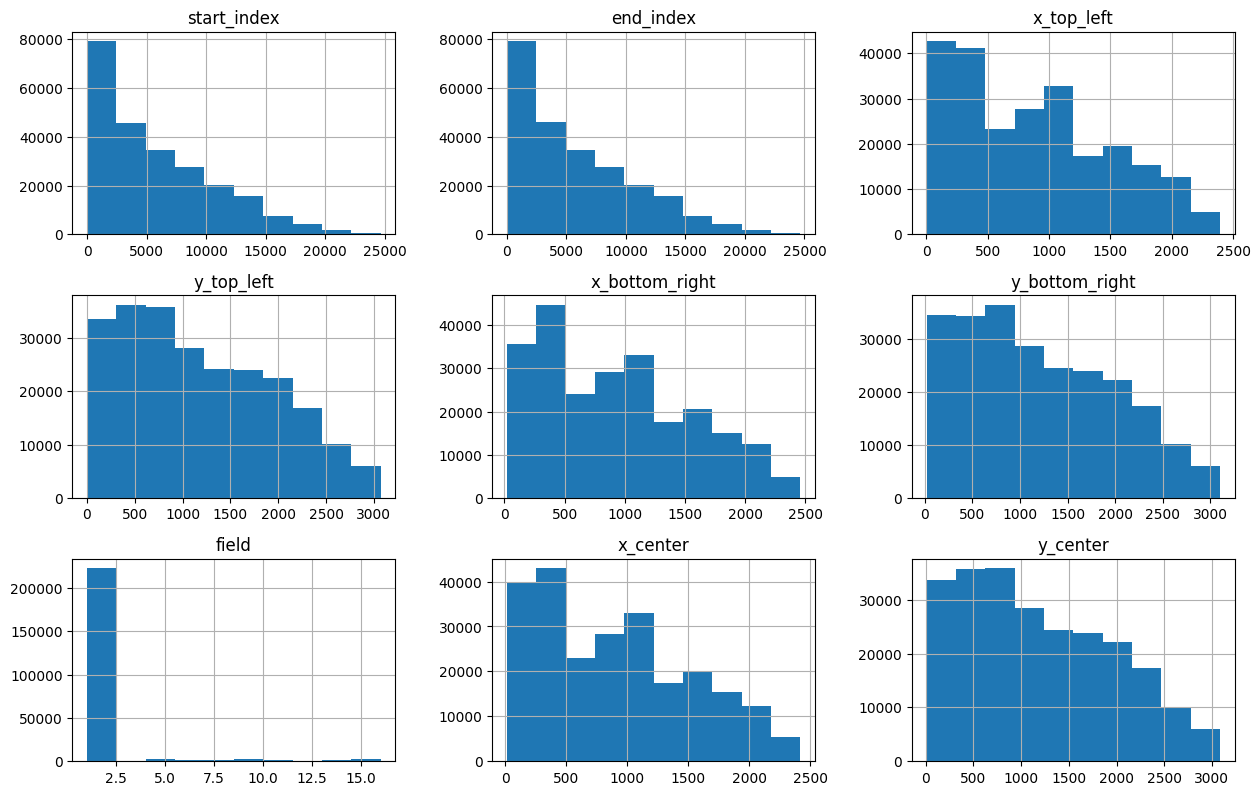

In [7]:
df.hist(figsize=(15,30),layout=(9,3))

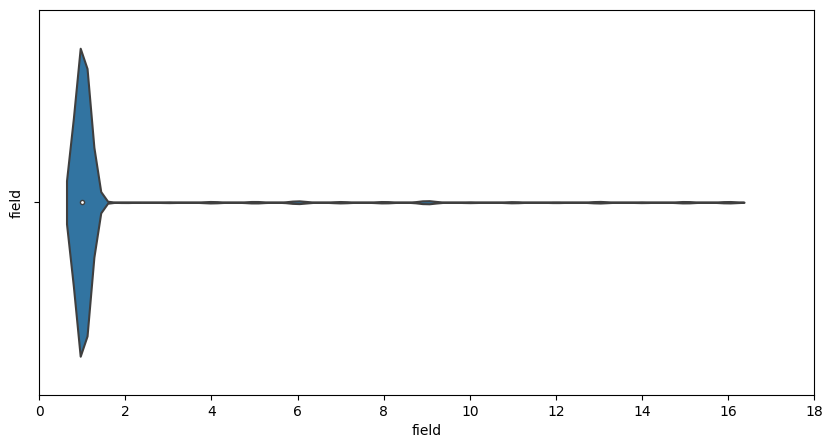

In [11]:
plt.figure(figsize=(10,5))
plt.xlim(0,18)
plt.ylim()
plt.ylabel('field')
#sns.boxplot(x=df['field'])
sns.violinplot(x=df['field'])
plt.show()

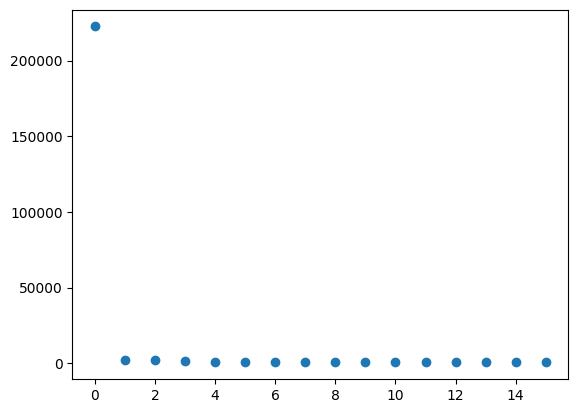

In [19]:
df1 = df['field'].value_counts()
plt.scatter(range(16),df1)

In [10]:
# Go with a hierarchical classification model. Classify Important vs other first. Then if important, classify between other classes.